In [3]:
!pip install timm flash_attn einops -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.4 MB/s eta 0:00:00


In [1]:
import requests
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM

In [4]:
model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)

pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [5]:
prompt = "<OD>"

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=prompt, images=image, return_tensors="pt")

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    num_beams=3,
    do_sample=False
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

parsed_answer = processor.post_process_generation(generated_text, task="<OD>", image_size=(image.width, image.height))

print(parsed_answer)

{'<OD>': {'bboxes': [[34.23999786376953, 160.0800018310547, 597.4400024414062, 371.7599792480469], [456.0, 97.68000030517578, 580.1599731445312, 261.8399963378906], [450.8800048828125, 276.7200012207031, 554.5599975585938, 370.79998779296875], [95.68000030517578, 280.55999755859375, 198.72000122070312, 371.2799987792969]], 'labels': ['car', 'door', 'wheel', 'wheel']}}


In [22]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [23]:
def process_image(path):

  image_cv2 = cv2.imread(path)
  image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
  image = Image.fromarray(image_rgb)

  return image

In [24]:
def parse_iamge(image):
  prompt = "<OCR>"

  inputs = processor(text=prompt, images=image, return_tensors="pt")

  generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=1024,
      num_beams=3,
      do_sample=False
  )
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

  parsed_answer = processor.post_process_generation(generated_text, task="<OCR>", image_size=(image.width, image.height))

  print(parsed_answer)

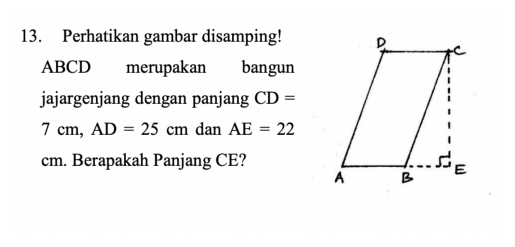

In [26]:
path = "/content/test_ocr_math_1.png"

img = mpimg.imread(path) #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

In [27]:
image = process_image(path)
parse_iamge(image)

{'<OCR>': '13. Perhatikan gambar disamping!ABCDmerupakanbangunjajargenjang dengan panjang CD =7 cm, AD = 25 cm dan AE = 22cm. Berapakah Panjang CE?AB'}


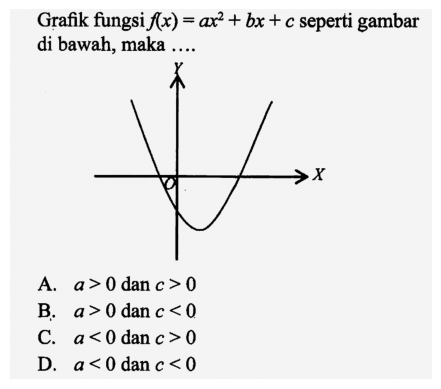

In [28]:
path = "/content/test_ocr_math_2.png"

img = mpimg.imread(path) #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
image = process_image(path)
parse_iamge(image)

{'<OCR>': 'Grafik fungsi f(x) = ax2 + bx + c seperti gambardi bawah, maka...XA. a > 0 dan c > 0B. a>0 dan c <0C. a<0 dan C > 0D. a <0 dan <0'}


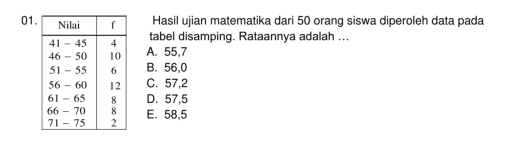

In [30]:
path = "/content/test_ocr_math_3.png"

img = mpimg.imread(path) #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

In [31]:
image = process_image(path)
parse_iamge(image)

{'<OCR>': '01.NilaiHasil ujian matematika dari 50 orang siswa diperoleh data padaftabel disamping. Rataannya adalah...41-4546-50A. 55,751-55B. 56,056-6012C. 57,261-65D. 57.566-7088E. 58,571-752'}
